<b>Описание проекта</b>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

<b>Цель исследования</b> - выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

<b>Описание данных</b>
    
Name — название игры
    
Platform — платформа
    
Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучите общую информацию

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import numpy as np
from scipy import stats as st

In [2]:
#сохраним датасет в переменную games
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#проверим на явные дубликаты
print(games.duplicated().sum())

0


In [6]:
games[games.duplicated(subset=['Name','Platform'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [7]:
print(games.query('Name == "Need for Speed: Most Wanted" and Platform == "X360"'))
print(games.query('Name == "Need for Speed: Most Wanted" and Platform == "PC"'))
print(games.query('Name == "Sonic the Hedgehog" and Platform == "PS3"'))
print(games.query('Name == "Madden NFL 13" and Platform == "PS3"'))

                             Name Platform  Year_of_Release   Genre  NA_sales  \
1190  Need for Speed: Most Wanted     X360           2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360           2005.0  Racing      1.00   

      EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
1190      0.78      0.01         0.15          83.0        8.5      T  
1591      0.13      0.02         0.10          83.0        8.5      T  
                              Name Platform  Year_of_Release   Genre  \
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
5972       0.02      0.23       0.0         0.04          82.0        8.5   
11715      0.00      0.06       0.0         0.02          82.0        8.5   

      Rating  
5972       T  
11715      T  
                    Name Platform  Year_of_Rel

In [8]:
games.drop(games.index[[4127, 16230]], inplace=True)

Выше найдены 4 дубликата по связке название-платформа.
В случае с обоими Need for Speed, возможно, это переиздания, т.к. годы релиза и продажи не совпадают.
В случае с Madden NFL и Sonic похоже на дубликат, думаю, можно удалить.
Строки с пропусками в названии и жанре мы удаляли ниже.

In [9]:
#узнаем количество пропусков в столбцах
games.isnull().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     268
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

## Подготовьте данные

In [10]:
#приведем названия столбцов к нижнему регистру
games.columns=games.columns.str.lower()

In [11]:
#узнаем процент пропусков в столбце с датой выхода игры
print(len(games[games['year_of_release'].isna()])*100/len(games))
#удалим строки с пропусками в столбце с датой выхода игры, т.к. их немного - 1.6%, но они нужны для анализа
games.dropna(subset=['year_of_release'],inplace=True)

1.6035421528151739


In [12]:
#проверим пропуски в столбце с названием
games.loc[games['name'].isna()]
#пропуски в столбце с названием совпадают с пропусками в столбце с жанром, удалим обе строки
games.dropna(subset=['name'],inplace=True)

In [13]:
#пропуски остались в столбцах с оценками критиков и игроков, а также с рейтингом игры
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце user_rating значение tbd означает, что оценка еще не присвоена.
В столбце rating значение RP означает, что рейтинг также еще только предстоит определить.
Заменим данные значения в обоих столбцах на пропуски, так как значения tbd и RP по смыслу и соответствуют пропускам. 

In [17]:
#заменим значения tbd в столбце user_score на пропуски
games.loc[games['user_score']=='tbd','user_score'] = np.nan

In [18]:
#заменим значения RP в столбце rating на пропуски
games.loc[games['rating']=='RP','rating'] = np.nan

In [19]:
#заменим пропуски в столбце рейтинг на undefined
games['rating'] = games['rating'].fillna('undefined')

Заменим пропуски в столбце rating на undefined, ниже в разделе о портретах пользователей сможем увидеть информацию о том, сколько продаж в денежном выражении приходится на игры без возрастного рейтинга в разрезе регионов.

Надеюсь, включение в undefined игр с рейтингом RP все же не является ошибкой, с другой стороны на момент анализа игра могла быть с рейтингом RP, а через месяц ей бы уже определили возрастной рейтинг, а мы ее уже добавили в undefined.


In [20]:
#переведем годы выпуска в целочисленный формат
games['year_of_release'] = games['year_of_release'].astype('int')

In [21]:
#оценки пользователей домножим на 10 
games['user_score'] = games['user_score'].astype('float')
games['user_score'] = games['user_score']*10

In [22]:
#добавим столбец с сумарными продажами 
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [23]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


## Проведите исследовательский анализ данных

In [24]:
games_by_year = games.groupby('year_of_release')[['name']].count()
print(games_by_year)

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              652
2013              544
2014              581
2015              606
2016              502


Text(0, 0.5, 'Игр выпущено')

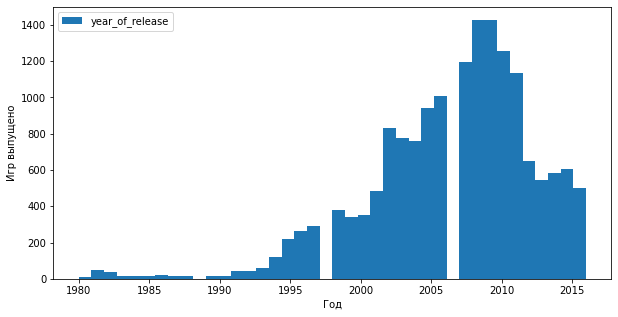

In [25]:
#построим гистограмму распределения выпуска игр по годам
games['year_of_release'].plot(kind='hist', bins=40, figsize = [10,5]).legend()
plt.xlabel('Год')
plt.ylabel('Игр выпущено')

In [26]:
sales_by_year = games.groupby('year_of_release')[['total_sales']].sum()
print(sales_by_year)

                 total_sales
year_of_release             
1980                   11.38
1981                   35.68
1982                   28.88
1983                   16.80
1984                   50.35
1985                   53.95
1986                   37.08
1987                   21.70
1988                   47.21
1989                   73.45
1990                   49.37
1991                   32.23
1992                   76.16
1993                   45.99
1994                   79.23
1995                   88.12
1996                  199.15
1997                  201.07
1998                  256.31
1999                  251.11
2000                  201.66
2001                  331.46
2002                  394.97
2003                  357.54
2004                  418.68
2005                  457.82
2006                  517.71
2007                  604.75
2008                  671.50
2009                  658.82
2010                  590.13
2011                  507.58
2012          

Text(0, 0.5, 'Количество проданных копий, млн')

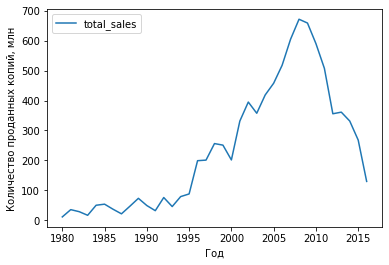

In [27]:
#построим график глобальных продаж игр по годам
sales_by_year.plot()
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')

Заметно появление компьютерных игр в 1980-е, стремительный рост в 1990-е с расптростанением персональных компьютеров, продолжение роста в 2000-е, пик - в 2008-2009 гг, затем спад, скорее всего из-за кризиса и высокой конкуренции с мобильными платформами.

Для дальнейшего прогноза на 2017 год есть смысл опираться на данные 2010-2016 годы, после окончания стадии роста глобального рынка компьютерных игр.

In [28]:
#отфильтруем датасет, где для анализа останутся только годы с 2010 по 2016, запишем в новую переменную
games_2010_2016 = games[(games['year_of_release']<2017)&(games['year_of_release']>2009)]
sales_by_platform_2010_2016 = games_2010_2016.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
print(sales_by_platform_2010_2016)

   platform  year_of_release  total_sales
0       3DS             2011        63.20
1       3DS             2012        51.36
2       3DS             2013        56.57
3       3DS             2014        43.76
4       3DS             2015        27.78
..      ...              ...          ...
60     X360             2016         1.52
61     XOne             2013        18.96
62     XOne             2014        54.07
63     XOne             2015        60.14
64     XOne             2016        26.15

[65 rows x 3 columns]


In [29]:
#узнаем топ-платформ по продажам игр в 2010-2016 годы
total_sales_by_platform_2010_2016 = sales_by_platform_2010_2016.groupby(by='platform')['total_sales'].sum().reset_index()
total_sales_by_platform_2010_2016.sort_values(by='total_sales', ascending = False, inplace = True)
top_platforms = total_sales_by_platform_2010_2016.sort_values(by='total_sales', ascending = False)['platform'].to_list()
print(total_sales_by_platform_2010_2016)

   platform  total_sales
4       PS3       587.73
10     X360       550.41
5       PS4       314.14
0       3DS       257.81
8       Wii       222.97
11     XOne       159.32
1        DS       123.75
2        PC       121.96
9      WiiU        82.19
6       PSP        64.05
7       PSV        53.81
3       PS2         6.09


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

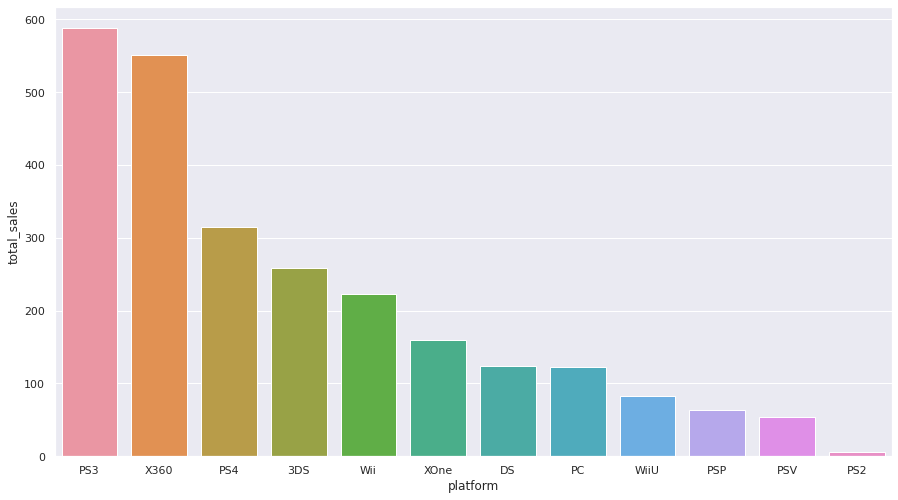

In [30]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(x=total_sales_by_platform_2010_2016['platform'], y=total_sales_by_platform_2010_2016['total_sales'])

По продажам игр, вышедших за период 2010-2016 гг., в очевидных лидерах платфоры PS3 и X360. 

Информации из данного графика недостаточно, т.к. некоторые платформы, продажи по которым в 2010-2016 гг были невысокими, могли быть на стадии становления/развития, а некоторые платформы-лидеры по продажам за этот период могли к 2016 году наоборот терять популярность.

Далее нужно посмтреть на какой стадии жизненного цикла на данный момент находтся каждая платформ, по которым происходили продажи игр в 2010-2016 гг. (@top_platforms). Для этого возьмем период с 2000 по 2016 гг.

In [31]:
#сделаем сводную таблицу для продаж игр за каждый год с 2000 по 2016 для выбранных платформ
games_2000_2016 = games.query('year_of_release > 1999 and year_of_release < 2017 and platform in @top_platforms')
sales_by_platform_2000_2016 = games_2000_2016.pivot_table(index=['year_of_release'],
                                       values=['total_sales'],
                                       columns='platform',
                                       aggfunc='sum',
                                       fill_value=0)
print(sales_by_platform_2000_2016.head())

                total_sales                                                  \
platform                3DS     DS     PC     PS2  PS3  PS4   PSP  PSV  Wii   
year_of_release                                                               
2000                    0.0   0.00   4.66   39.17  0.0  0.0  0.00  0.0  0.0   
2001                    0.0   0.00   5.47  166.43  0.0  0.0  0.00  0.0  0.0   
2002                    0.0   0.00   8.57  205.38  0.0  0.0  0.00  0.0  0.0   
2003                    0.0   0.00   8.84  184.31  0.0  0.0  0.00  0.0  0.0   
2004                    0.0  17.27  10.39  211.81  0.0  0.0  7.06  0.0  0.0   

                                
platform        WiiU X360 XOne  
year_of_release                 
2000             0.0  0.0  0.0  
2001             0.0  0.0  0.0  
2002             0.0  0.0  0.0  
2003             0.0  0.0  0.0  
2004             0.0  0.0  0.0  


In [32]:
sales_by_platform_2000_2016.columns = ['3DS','DS','PC','PS2','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne']

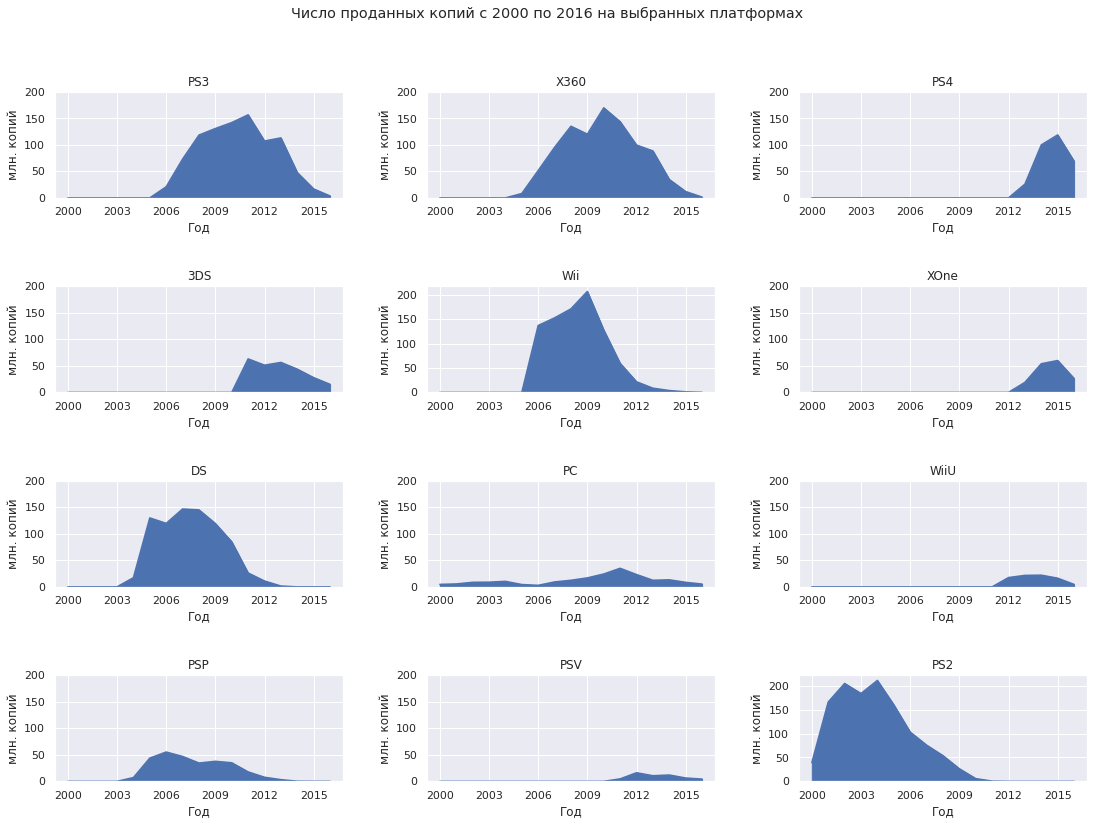

In [33]:
#построим графики продаж игр по каждой из выбранных платформ за период 2000-2016 гг.

nrows = 4  
ncols = 3  
c = 1  

fig = plt.figure(figsize=(16,12))
fig.suptitle('Число проданных копий с 2000 по 2016 на выбранных платформах')
fig.tight_layout(pad = 4.0)
for i in top_platforms:
    plt.subplot(nrows, ncols, c)
    plt.title(i)
    sales_by_platform_2000_2016[i].plot.area()
    plt.xlabel('Год')
    plt.ylabel('млн. копий')
    plt.xticks(np.arange(min(sales_by_platform_2000_2016.index), max(sales_by_platform_2000_2016.index)+1, 3.0))
    plt.yticks(np.arange(0, 201, 50))
    c = c+1
fig.tight_layout(pad = 3.0)


Из графиков за 2000-2016 годы по 12 платформам, продажи по которым имели место в период с 2010 по 2016 годы, можно сделать следующие выводы:
1. В целом, на примере таких популярных платформ как PS3, X360, DS и PS2, жизненный цикл платформы можно оценить примерно в 10 лет.
2. Несмотря на то, что из графика продаж по платформам за период с 2010 по 2016 годы было очевидно лидерство PS3 и X360, графики выше демонстрируют, что данные платформы к 2016 году находятся в конце своего жизненного цикла.
3. Следует ориентироваться на платформы PS4 и XOne, появившиеся в 2012 году, также потенциал еще есть у платформы 3DS, появившейся в 2010 году.

Далее для анализа берем только период 2010-2016 гг.

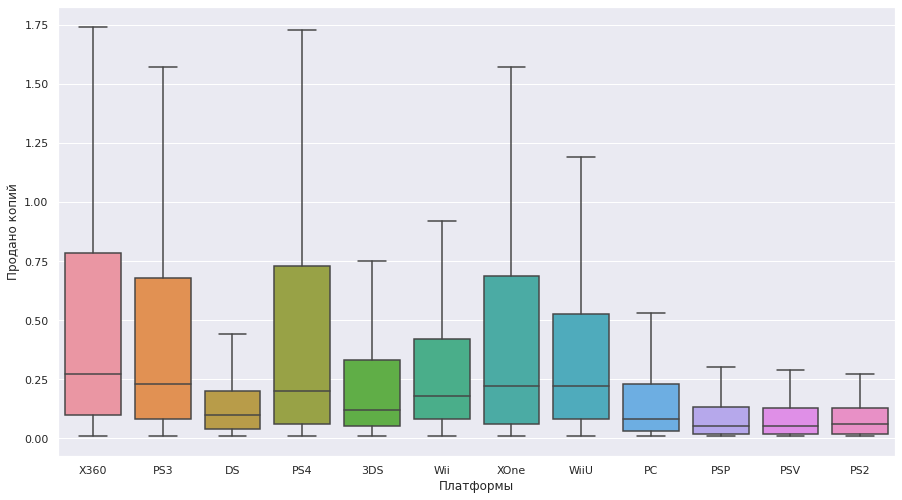

In [34]:
#построим ящик с усами для платформ, продажи по которым были в период с 2010 по 2016 гг
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(data=games_2010_2016, x='platform', y='total_sales', showfliers = False)
plt.xlabel('Платформы')
plt.ylabel('Продано копий')
plt.show()

Из графика видно, что медиана продаж для игр на платформе XOne выше, чем на PS4. В то же время распределение для PS4 имеет скос вправо, что говорит о наличии большего числа игр-блокбастеров на PS4, чем на Xone.

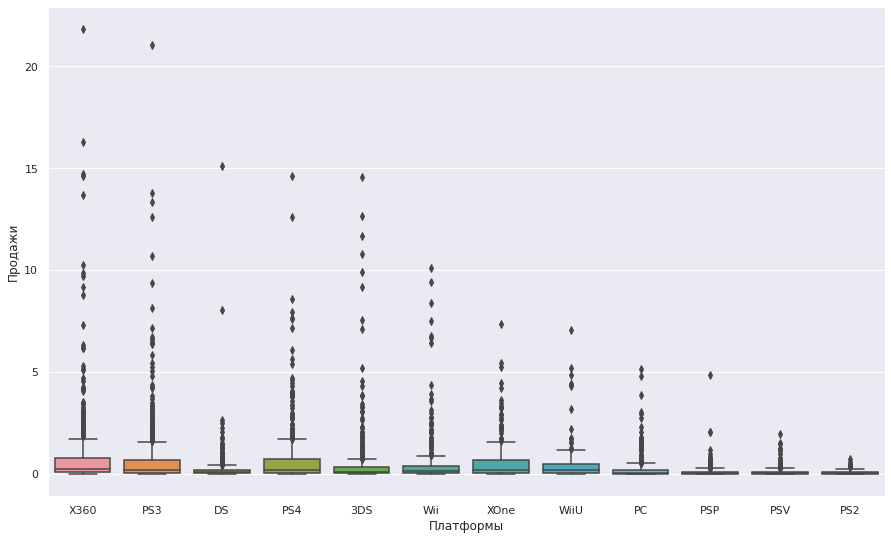

In [35]:
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(data=games_2010_2016, x='platform', y='total_sales', showfliers = True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Из графика с выбросами видно, что самые хитовые игры за данный период были выпущены на платформах X360 и PS3, но не забываем, что жизненный цикл данных платформ к 2016 г. походит к концу.
    
Что касается платформ, на которые мы решили ориентироваться (PS4, XOne и 3DS), то здесь можно отметить, что на платформе 3DS выходило много игр-хитов, игр с продажами более 10 млн копий, даже больше, чем у платформы PS4.

Сравнивая популярные в Америке и Европе PS4 и XOne, можно сказать, что игры с продажами более 10 млн копий есть только у PS4, игры с продажами более 5 млн копий есть у обеих платформ, но у PS4 их больше.

In [36]:
#выберем для период 2010-2016 гг игры на платформе PS4
ps4_data = games_2010_2016.query('platform == "PS4" and critic_score > 0 and user_score > 0')

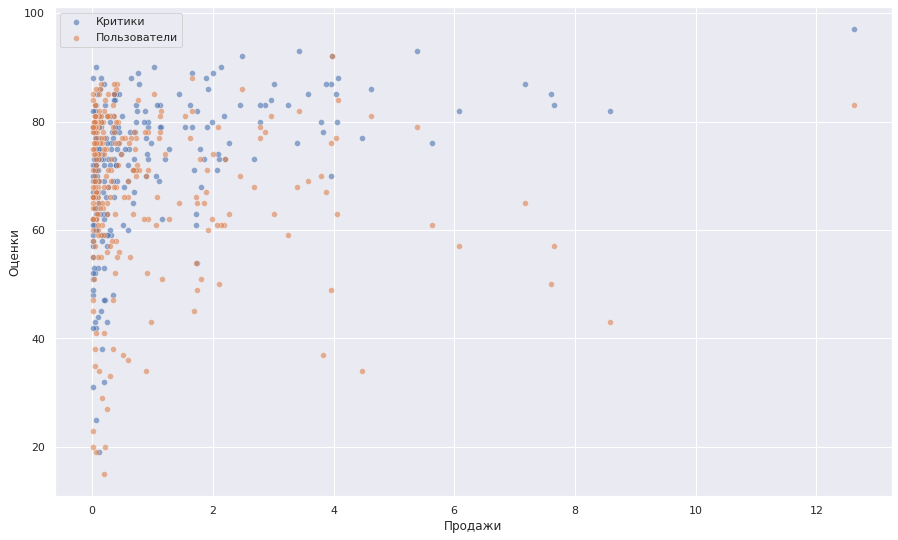

In [37]:
#построим диаграмму рассеивания
sns.scatterplot(data=ps4_data, x='total_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=ps4_data, x='total_sales', y='user_score', alpha=0.6)
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [38]:
#выберем игры с продажами менее 1 млн копий
ps4_data_less_1_mln = ps4_data.query('total_sales < 1')

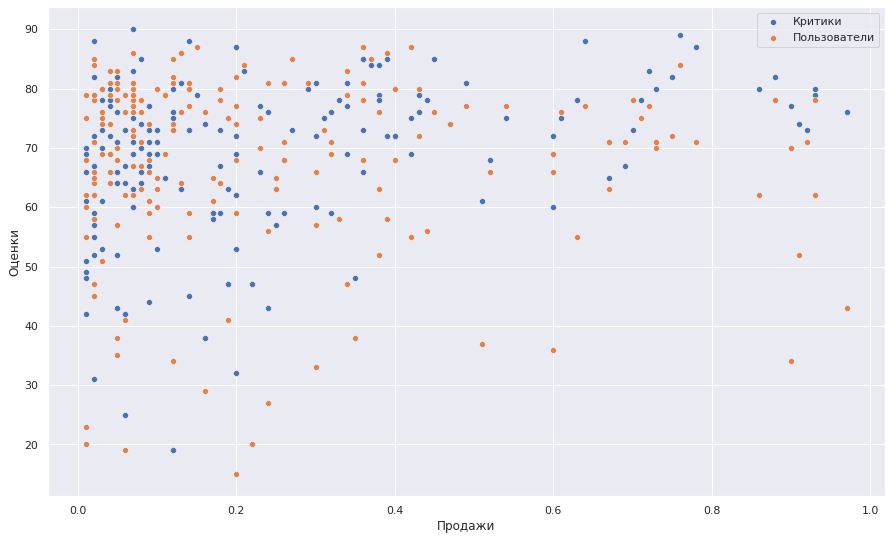

In [39]:
sns.scatterplot(data=ps4_data_less_1_mln, x='total_sales', y='critic_score')
sns.scatterplot(data=ps4_data_less_1_mln, x='total_sales', y='user_score')
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [40]:
#выберем игры с продажами более 1 млн копий
ps4_data_more_1_mln = ps4_data.query('total_sales > 1')

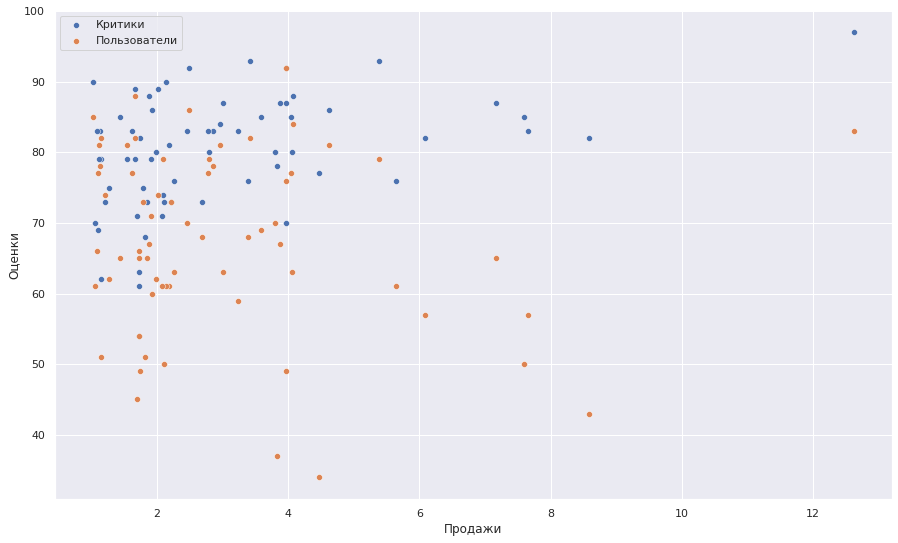

In [41]:
sns.scatterplot(data=ps4_data_more_1_mln, x='total_sales', y='critic_score')
sns.scatterplot(data=ps4_data_more_1_mln, x='total_sales', y='user_score')
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [42]:
#посторим матрицу корреляции оценок и продаж для PS4
ps4_data[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


In [43]:
#посторим матрицу корреляции оценок и продаж для PS4 для игра менее чем с 1 млн проданных копий
ps4_data_less_1_mln[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.637252,-0.015898
critic_score,0.637252,1.000000,0.308644
total_sales,-0.015898,0.308644,1.000000


In [44]:
#посторим матрицу корреляции оценок и продаж для PS4 для игра более чем с 1 млн проданных копий
ps4_data_more_1_mln[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.427860,-0.123617
critic_score,0.427860,1.000000,0.400709
total_sales,-0.123617,0.400709,1.000000


In [45]:
#посторим матрицу корреляции оценок и продаж для PS4 для игра более чем с 2 млн проданных копий
ps4_data_more_2_mln = ps4_data.query('total_sales > 2')
ps4_data_more_2_mln[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.511944,-0.137465
critic_score,0.511944,1.000000,0.361766
total_sales,-0.137465,0.361766,1.000000


Для периода 2010-2016 гг:

Из диаграмм рассеивания можно сделать вывод, что самые продаваемые игры на платформе PS4 (возьмем игры с продажами более 2 млн копий) никогда не оцениваются критиками ниже 70 баллов, в то же время оценки у таких игр среди пользователей часто бывают ниже 70 баллов, есть даже оценки ниже 40 баллов.

Судя по коэффициентам корреляции между оценками пользователей и продажами игр на платформе PS4 нет никакой взаимосвзязи.

Между оценками критиков и продажами игр есть незначительная связь, коэф. корреляции 0.4, при этом нельзя сказать, что связь становится тем сильнее, чем более хитовые игры мы берем для анализа взаимосвязи.  

Соотнесем выводы с платформой Xone.

In [46]:
xone_data = games_2010_2016.query('platform == "XOne" and critic_score > 0 and user_score > 0')

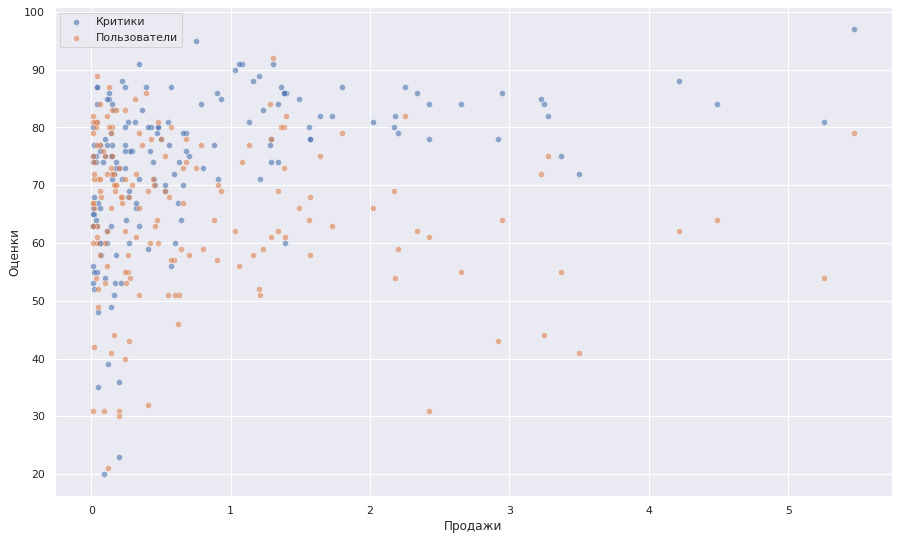

In [47]:
sns.scatterplot(data=xone_data, x='total_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=xone_data, x='total_sales', y='user_score', alpha=0.6)
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [48]:
xone_data_more_1_mln = xone_data.query('total_sales > 1')

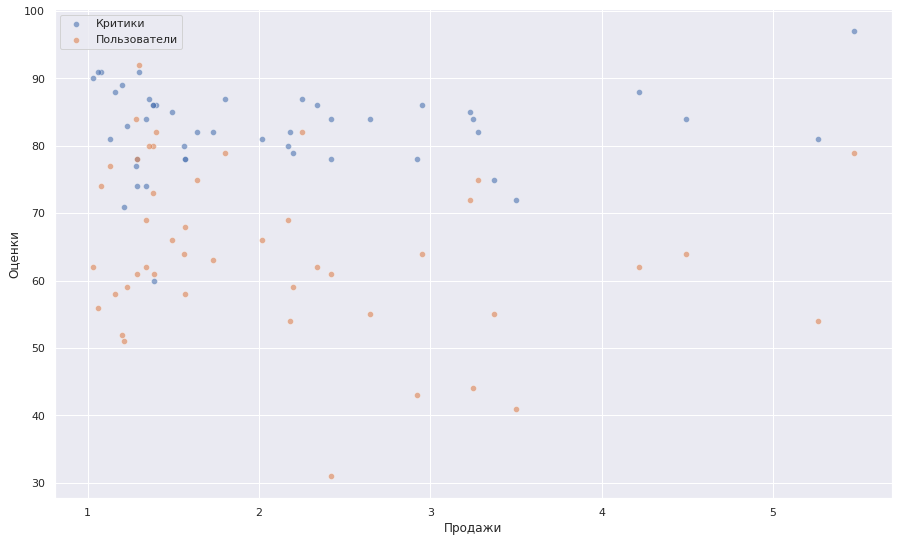

In [49]:
sns.scatterplot(data=xone_data_more_1_mln, x='total_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=xone_data_more_1_mln, x='total_sales', y='user_score', alpha=0.6)
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.show()

In [50]:
xone_data_less_1_mln = xone_data.query('total_sales < 1')
xone_data_more_2_mln = xone_data.query('total_sales > 2')

In [51]:
xone_data[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
total_sales,-0.094003,0.410422,1.000000


In [52]:
xone_data_less_1_mln[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.588652,-0.034153
critic_score,0.588652,1.000000,0.300717
total_sales,-0.034153,0.300717,1.000000


In [53]:
xone_data_more_1_mln[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.328292,-0.226187
critic_score,0.328292,1.000000,0.112908
total_sales,-0.226187,0.112908,1.000000


In [54]:
xone_data_more_2_mln[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.636378,0.110675
critic_score,0.636378,1.000000,0.352428
total_sales,0.110675,0.352428,1.000000


Данные по XOne подтверждают выводы по PS4 относительно связи оценок критиков и пользователей на продажи:
1. Для игр с количеством проданных копий более 2 нет оценко критиков меньше 70, хотя много оценко ниже 70 среди пользователей.
2. Взаимосвязи между оценками пользователей и продажами также нет, и также взаимосвязь между оценками критиков и продажами незначительная (коэф. корреляции - 0.41 по всей выборке), при этом для игр с количеством проданных копий более 1 млн связи между продажами и оценкаи критиков совсем нет (коэф. корреляции 0.11).

In [55]:
#построим сводную таблицу количества выпущенных игр и объема продаж игр в разрезе жанров
games_by_genre_pivot = games_2010_2016.pivot_table(index='genre', values='total_sales', aggfunc=['sum','count'])
games_by_genre_pivot.columns = ['total_sales','number_of_games']
print(games_by_genre_pivot)

              total_sales  number_of_games
genre                                     
Action             673.09             1495
Adventure           61.00              563
Fighting            81.59              199
Misc               234.56              576
Platform           119.72              153
Puzzle              20.60              114
Racing             122.68              237
Role-Playing       315.28              568
Shooter            479.74              410
Simulation          71.75              217
Sports             328.38              574
Strategy            35.84              170


In [56]:
games_by_genre_pivot.sort_values(by='total_sales', ascending=False).head()

,total_sales,number_of_games
genre,,
Action,673.09,1495
Shooter,479.74,410
Sports,328.38,574
Role-Playing,315.28,568
Misc,234.56,576


In [57]:
games_by_genre_pivot.sort_values(by='total_sales', ascending=False).tail()

,total_sales,number_of_games
genre,,
Fighting,81.59,199
Simulation,71.75,217
Adventure,61.00,563
Strategy,35.84,170
Puzzle,20.60,114


In [58]:
games_by_genre_pivot.sort_values(by='number_of_games', ascending=False).head()

,total_sales,number_of_games
genre,,
Action,673.09,1495
Misc,234.56,576
Sports,328.38,574
Role-Playing,315.28,568
Adventure,61.00,563


In [59]:
games_by_genre_pivot.sort_values(by='number_of_games', ascending=False).tail()

,total_sales,number_of_games
genre,,
Simulation,71.75,217
Fighting,81.59,199
Strategy,35.84,170
Platform,119.72,153
Puzzle,20.60,114


1. В тройке жанров по наибольшему количеству выпущенных игр за 2010-2016 гг. - экшн, аркады и спорт.
2. В тройке жанров по наименьшему количеству выпущенных игр за 2010-2016 гг. - стратегии, платформеры и головоломки.
3. В троейке лидеров жанров по объему продаж игр в денежном выражении за 2010-2016 гг. - экшн, шутеры и спорт. 
4. Наименее продаваемые жанры за акутальный период - приключения, стратегии и головоломки.

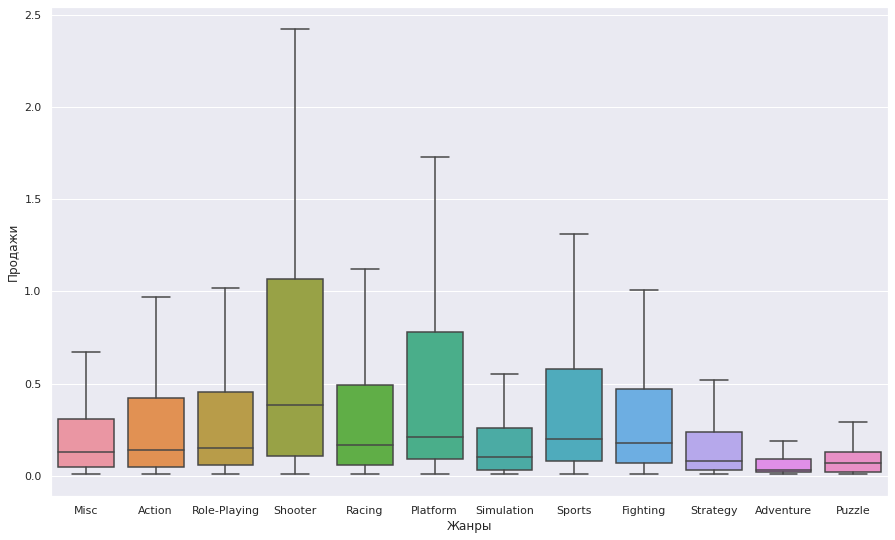

In [60]:
#построим ящик с усами для продаж игр в разрезе жанров
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(data=games_2010_2016, x='genre', y='total_sales', showfliers=False)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

График ящик с усами демонстрирует, что медианное значение совокупных продаж шутеров самое большое среди всех жанров. График для шутеров скошен вправо, что еще раз говорит о том, что в данной жанре много игр-блокбастеров.

Самое низкое медианное значение продаж у игры в жанре приключения. 

## Составьте портрет пользователя каждого региона

<AxesSubplot:xlabel='genre'>

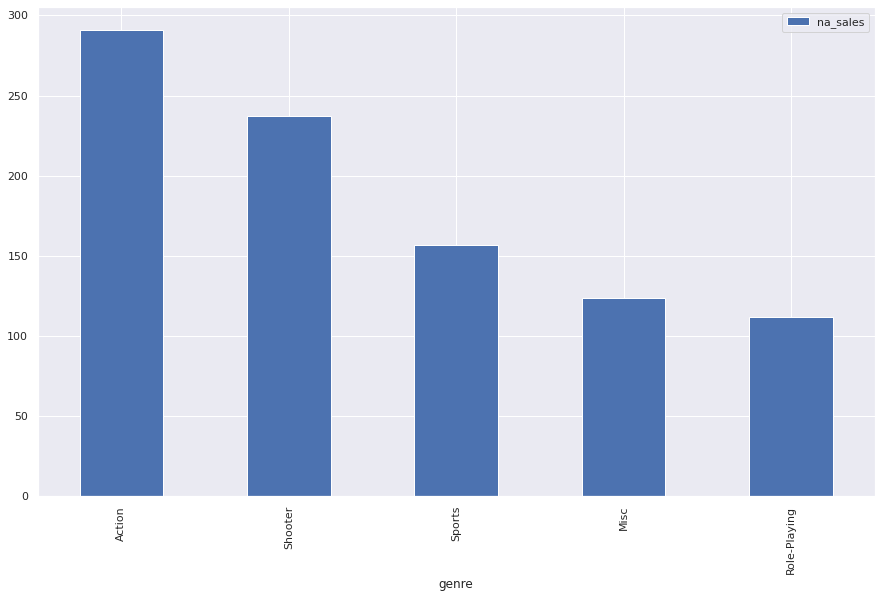

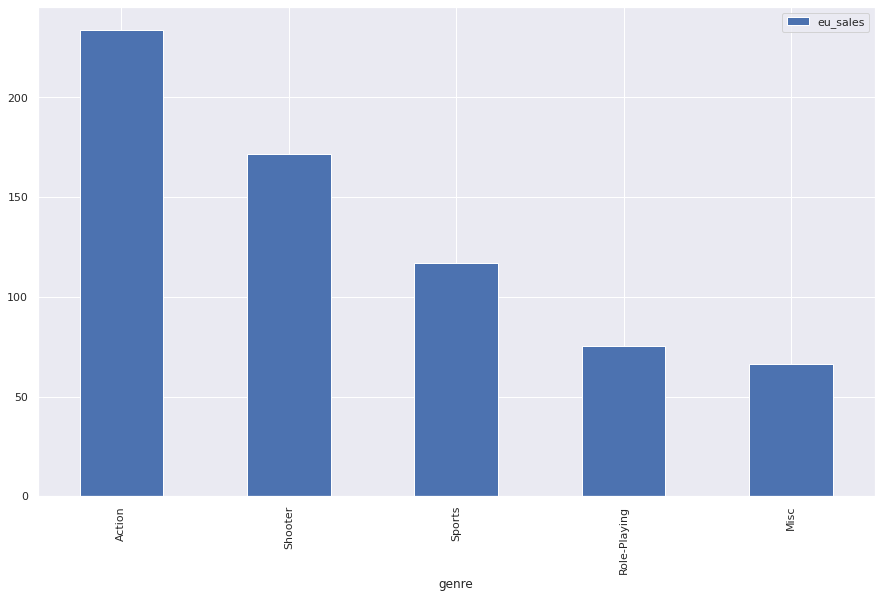

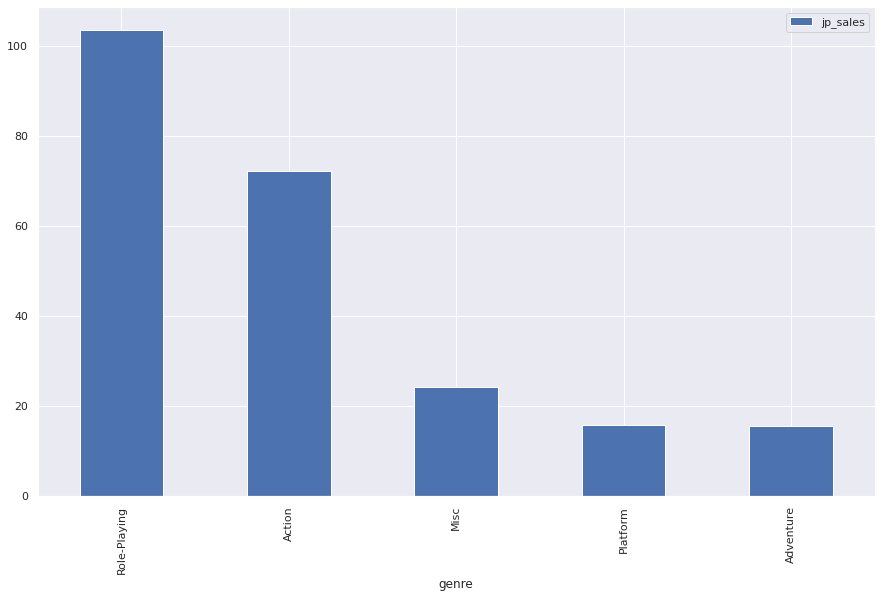

In [61]:
games_2010_2016.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar')
games_2010_2016.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar')
games_2010_2016.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar')

За период 2010-2016 гг:
1. В Северной Америке по совокупным продажам игр среди жанров лидируют экшены, шутеры и спорт.
2. В Европе вкусы игроков такие же, как в Северной Америке: в лидерах экшены, шутеры и спорт.
3. В Японии лидер по продажам среди жанров - ролевые игры, которых нет среди лидеров в Северной Америке и Европе. Также в Японии в лидерах экшены и аркады. Шутеров и спорта нет в 5-ке игр по продажам.

<AxesSubplot:xlabel='platform'>

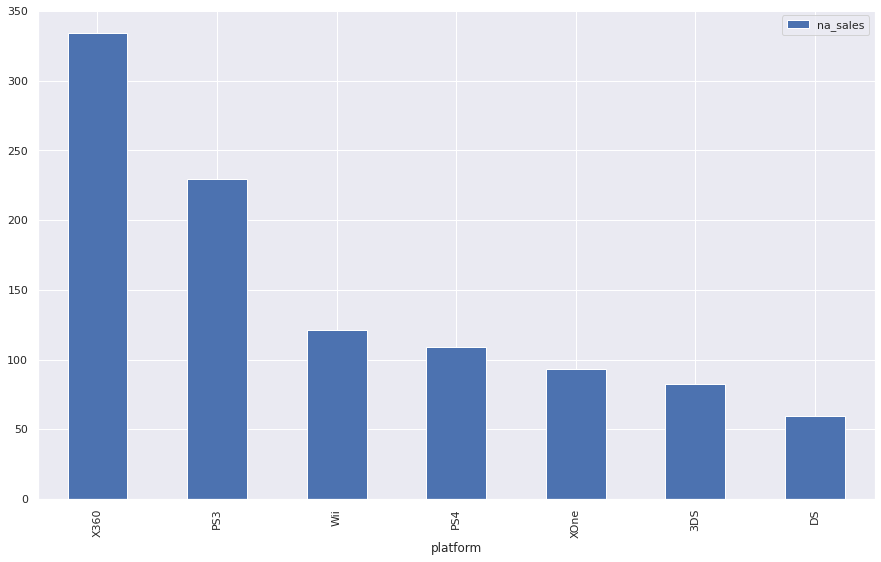

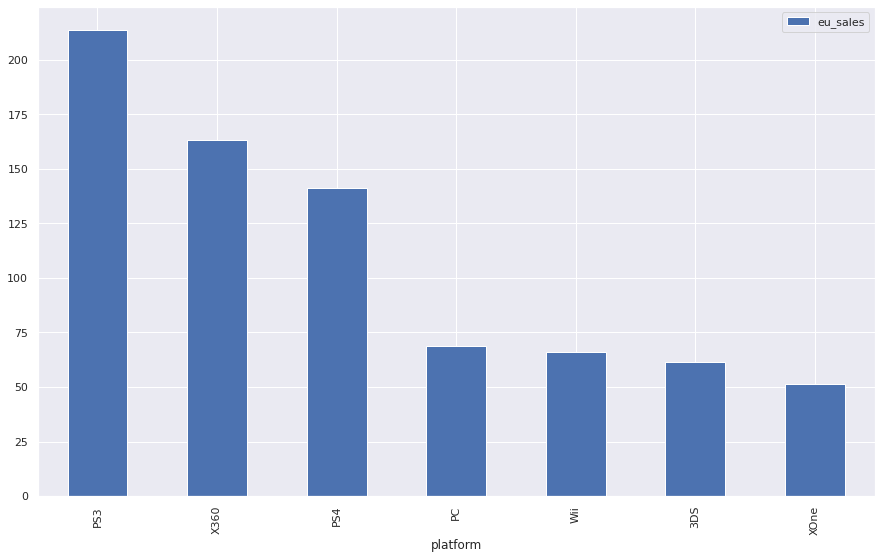

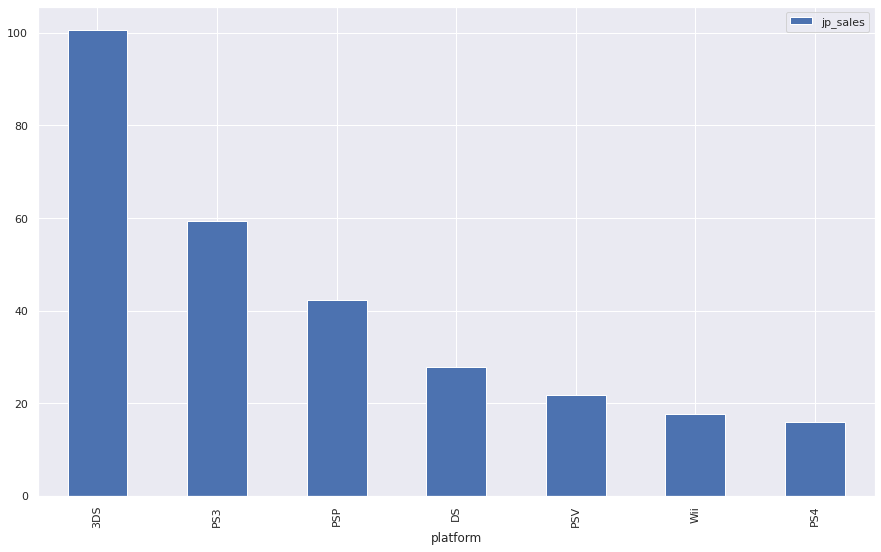

In [62]:
games_2010_2016.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(7).plot(kind='bar')
games_2010_2016.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(7).plot(kind='bar')
games_2010_2016.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(7).plot(kind='bar')

За период 2010-2016 гг:

1. В Северной Америке и Европе - топ2 по продажам среди платформ - X360 и PS3. Однако помним, что эти платформы в конце своего жизненного цикла к 2016 году.
2. В Северной Америке и Европе интересующая нас платформа PS4 - в топ4. Платформа XOne в Северной Америке - на 5 месте, в Европе - на 7.
3. В Японии лидер по продажам среди платформ - 3DS, созданная в 2010 году, к 2016 году находящаяся в середине жизненного цикла. PS4 - в Японии - на 7 месте, XOne - в Японии - совсем не популярна. 

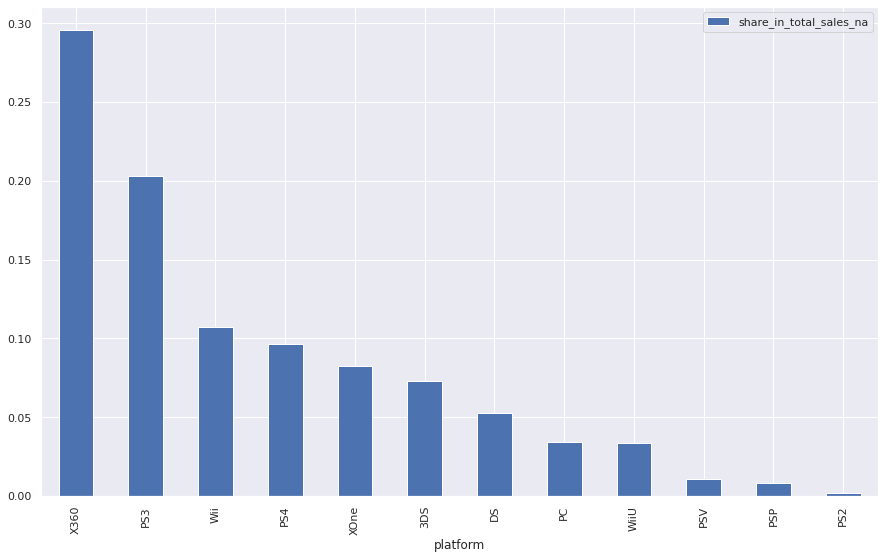

In [63]:
na_by_platform = games_2010_2016.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
na_by_platform['share_in_total_sales_na'] = na_by_platform['na_sales']/games_2010_2016['na_sales'].sum()
na_by_platform['share_in_total_sales_na'].plot(kind='bar', y='platform').legend()

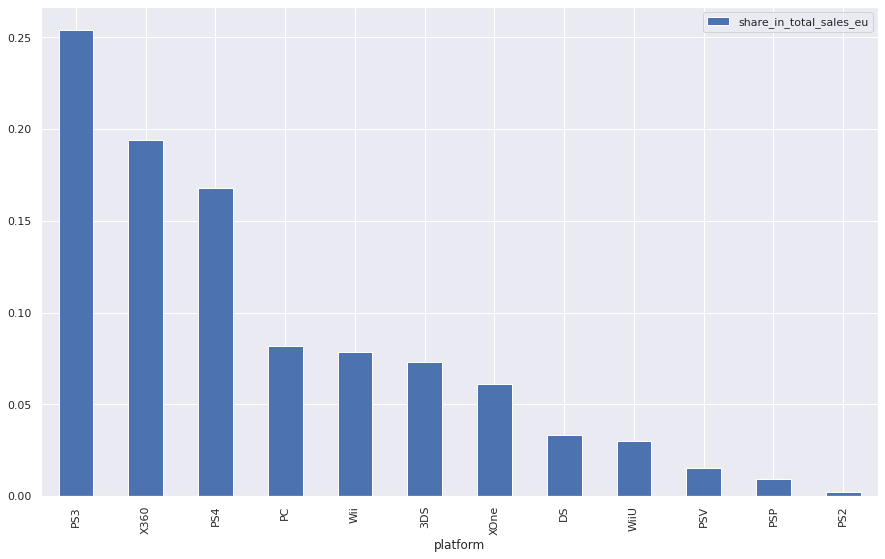

In [64]:
eu_by_platform = games_2010_2016.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
eu_by_platform['share_in_total_sales_eu'] = eu_by_platform['eu_sales']/games_2010_2016['eu_sales'].sum()
eu_by_platform['share_in_total_sales_eu'].plot(kind='bar', y='platform').legend()

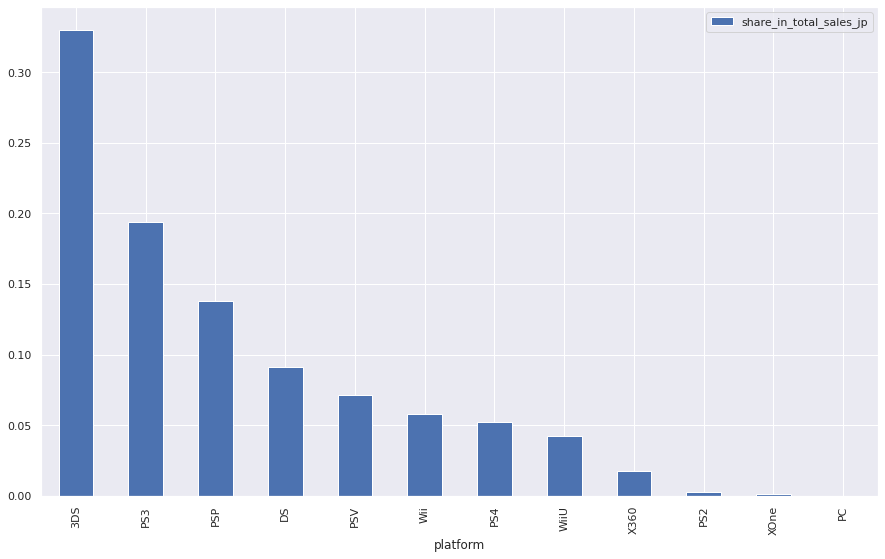

In [65]:
jp_by_platform = games_2010_2016.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
jp_by_platform['share_in_total_sales_jp'] = jp_by_platform['jp_sales']/games_2010_2016['jp_sales'].sum()
jp_by_platform['share_in_total_sales_jp'].plot(kind='bar', y='platform').legend()

<AxesSubplot:xlabel='rating'>

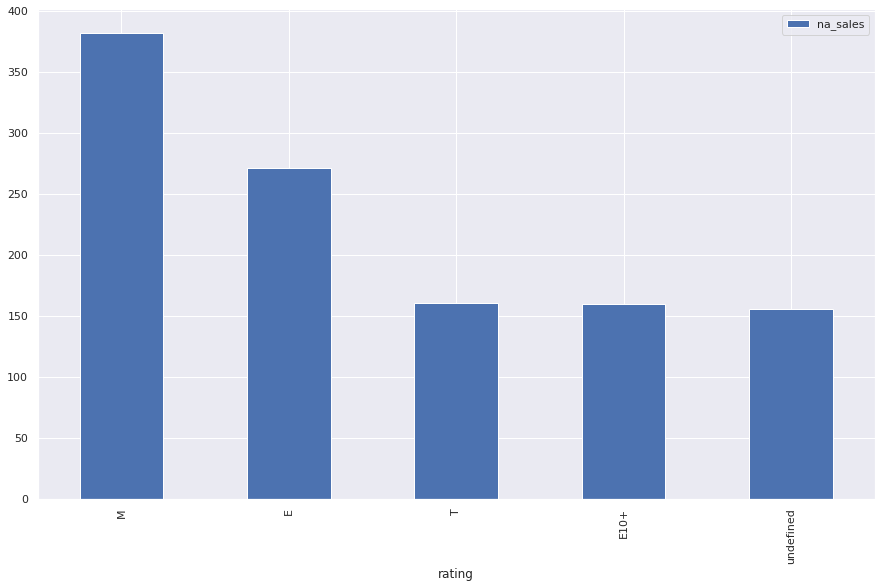

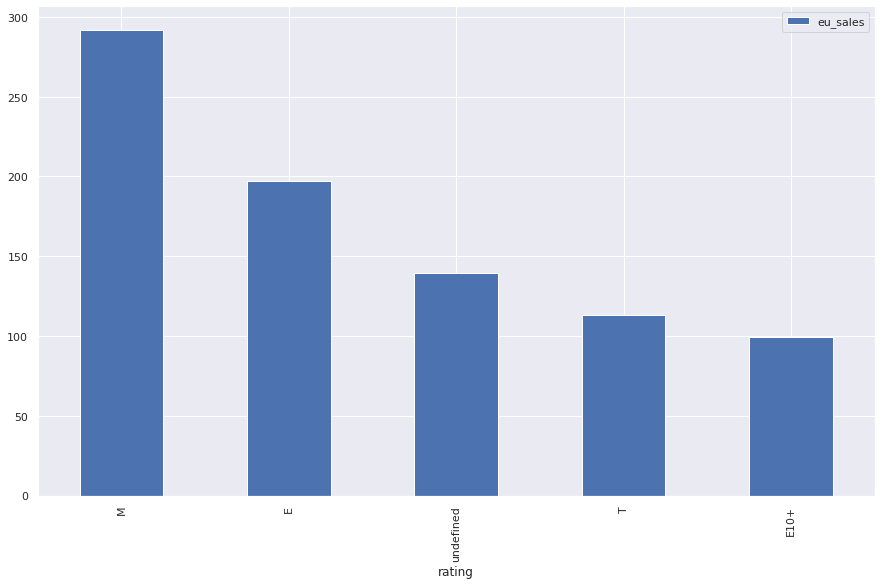

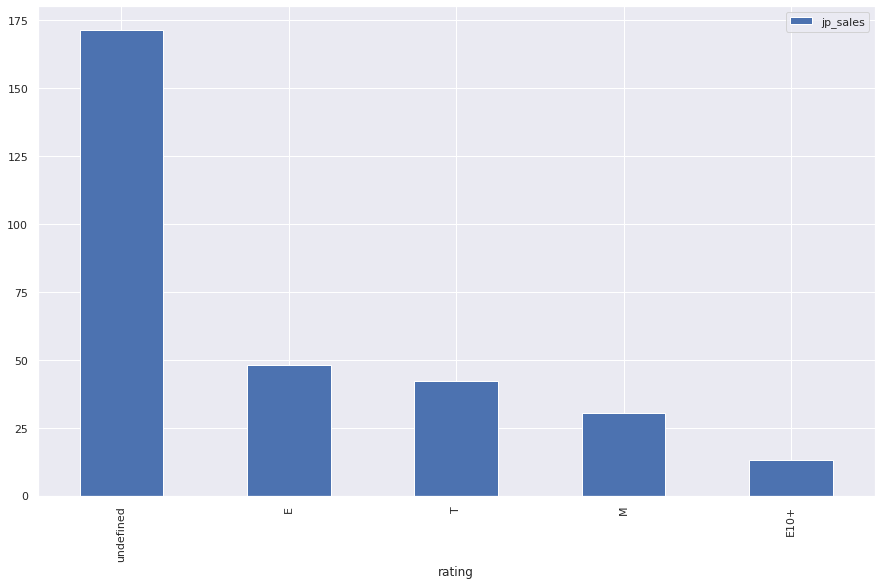

In [66]:
games_2010_2016.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar')
games_2010_2016.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar')
games_2010_2016.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar')

За период 2010-2016 гг:

1. В Северной Америке два очевидных лидера по совокупным продажам игр в разрезе рейтинга ESRB - это игры для взрослых (М) и игры для всех (Е).
2. В Европе те же 2 лидера по продажам разрезе рейтинга ESRB (игры для взрослых (М) и игры для всех (Е)).
3. В Европе и Северной Америке примерно одинаковый объем продаж игр без возрастного рейтинга (undefined), примерно в 150 млн копий.
4. В Японии очевидный лидер по продажам в разрезе рейтинга ESRB игры без возрастного рейтинга (undefined).
5. В целом, можео заметить почти одинаковое распределение продаж игр в разрезе рейтинга ESRB для Северной Америки и Европы. Для Японии картина сильно отличается тем, что там в лидерах игры без возрастного рейтинга с 3-кратным отрывом от игр с рейтингом для всех (E) и игр для подростков (T).
6. Если я правильно понял, такое большое количество игр без рейтинга в Японии объясняется тем, что на территории Японии действует свое рейтинговое агентство CERO. На самом-то деле там почти все игры с рейтингом, просто у нас есть данные только по рейтингу ESRB.

## Проверьте гипотезы

Проверим гипотезу о равенстве средних пользовательских оценок среди платформ Xbox One и PC:

H0: средние пользовательские оценки среди платформ Xbox One и PC одинаковые.

H1: cредние пользовательские оценки среди платформ Xbox One и PC различаются.

In [67]:
xone_user_scores = games_2010_2016.query('platform == "XOne" and user_score > 0')['user_score']
pc_user_scores = games_2010_2016.query('platform == "PC" and user_score > 0')['user_score']

In [68]:
alpha = 0.05

results = st.ttest_ind(
    xone_user_scores,
    pc_user_scores,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9801634129117981
Не получилось отвергнуть нулевую гипотезу


Вывод: средние пользовательские оценки среди платформ Xbox One и PC одинаковые.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
> средние пользовательские оценки среди платформ Xbox One и PC одинаковые.
    
Ты правильно сформулировал гипотезы и выбрал подходящий способ проверки, но лучше сказать, что между оценками нет статистически значимой разницы
</div>

Проверим гипотезу о равенстве средних пользовательских оценок среди жанров Action и Sports:

H0: средние пользовательские оценки среди жанров Action и Sports одинаковые.

H1: средние пользовательские оценки среди жанров Action и Sports различаются.

In [69]:
action_user_scores = games_2010_2016.query('genre == "Action" and user_score > 0')['user_score']
sports_user_scores = games_2010_2016.query('genre == "Sports" and user_score > 0')['user_score']

In [70]:
alpha = 0.05

results = st.ttest_ind(
    action_user_scores,
    sports_user_scores,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8577558919385787e-15
Отвергаем нулевую гипотезу


Вывод: средние пользовательские оценки среди жанров Action и Sports различаются.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Все верно 

</div>

## Общий вывод

Анализ глобального рынка компьютерных игр показал, что пик продаж игр в мире пришелся на 2008-2009 годы, далее в силу ряда причин, среди которых, скорее всего, мировой финансовый кризис 2008 года и высокая конкуренция с мобильными платформами, имело место ежегодное падение объема продаж, продолжающееся до сих пор.

Исходя из этого, дальнейший анализ было решено проводить в рамках периода 2010-2016 гг.

Графики продаж игр в разрезе платформ продемострировали, что в среднем жизненный цикл одной платформы можно оценить примерно в 10 лет.

Исходя из продаж игр в разрезе платформ за период 2010-2016 гг и анализа жизненных циклов всех платформ, по которым имели место продажи в данный период, был сделан вывод, что наиболее пристальное внимание заслуживают платформы PS4 и XOne, появившиеся в 2012 году, а также популярная в Японии 3DS, появившаяся в 2010 году.

Для продаж в Северной Америке и Европе следует ориентироваться на платформы PS4 и XOne и такие жанры игр как экшены, шутеры и спортивные симуляторы.

Для продаж в Японии следует ориентироваться на платформу 3DS и такие жанры как ролевые игры и экшены. 

В то же время внимание больше всё же стоит сконцентрировать на Северной Америке и Европе, там емкость рынка намного выше, чем в Японии. 
